### Mandelbrot
This notebook is inspired by the [TensorFlow documentation](https://www.tensorflow.org/versions/r0.11/tutorials/mandelbrot/index.html) using assignments `tf.assign` and `tf.assign_add` to update variables in the graph from python.

### Definition of the Mandelbrot set
Remember the 80ies! z is a complex number. We consider the recursive relation 

$$
      z_{n+1} = z^2_{n} + c \text{  with  } z_0 = 0      
$$

Now consider several numbers c, like $c=0 + 0 \cdot i$ if above recursion does not diverge, then c is part of the Mandelbrot set. 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#  Preparing the grid
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
C_ = np.asarray(X+1j*Y, dtype='complex64')
Z_ = np.zeros_like(C_, dtype='complex64')
C_.shape
C_

array([[-2.00000000-1.29999995j, -1.99500000-1.29999995j,
        -1.99000001-1.29999995j, ...,  0.98500001-1.29999995j,
         0.99000001-1.29999995j,  0.99500000-1.29999995j],
       [-2.00000000-1.29499996j, -1.99500000-1.29499996j,
        -1.99000001-1.29499996j, ...,  0.98500001-1.29499996j,
         0.99000001-1.29499996j,  0.99500000-1.29499996j],
       [-2.00000000-1.28999996j, -1.99500000-1.28999996j,
        -1.99000001-1.28999996j, ...,  0.98500001-1.28999996j,
         0.99000001-1.28999996j,  0.99500000-1.28999996j],
       ..., 
       [-2.00000000+1.28499997j, -1.99500000+1.28499997j,
        -1.99000001+1.28499997j, ...,  0.98500001+1.28499997j,
         0.99000001+1.28499997j,  0.99500000+1.28499997j],
       [-2.00000000+1.28999996j, -1.99500000+1.28999996j,
        -1.99000001+1.28999996j, ...,  0.98500001+1.28999996j,
         0.99000001+1.28999996j,  0.99500000+1.28999996j],
       [-2.00000000+1.29499996j, -1.99500000+1.29499996j,
        -1.99000001+1.2949999

### Feeding in the Z-values repeatingly

In [5]:
tf.reset_default_graph()
C = tf.placeholder(shape=C_.shape, dtype='complex64', name = 'C')
Z = tf.placeholder(shape=C_.shape, dtype='complex64', name='Z')

Z_new = Z*Z + C

writer = tf.train.SummaryWriter("/tmp/dumm/mandelbrot_1", tf.get_default_graph(), 'graph.pbtxt').close()
with tf.Session() as sess:
    tf.initialize_all_variables().run()
    for i in range(200):
        Z_ = sess.run(Z_new, {C:C_, Z:Z_})

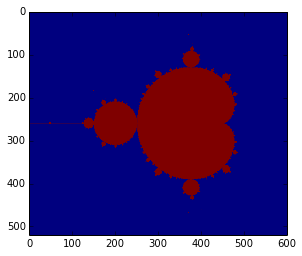

In [7]:
plt.imshow(np.abs(Z_ < 4))

#### Using the assignment operator

In [8]:
tf.reset_default_graph()
C = tf.placeholder(shape=C_.shape, dtype='complex64', name = 'C')
Z = tf.Variable(tf.zeros(C_.shape, dtype='complex64'), name='Z')

assigning_op = Z.assign(Z*Z + C) #Z <- Z*Z + C

writer = tf.train.SummaryWriter("/tmp/dumm/mandelbrot", tf.get_default_graph(), 'graph.pbtxt').close()
with tf.Session() as sess:
    tf.initialize_all_variables().run()
    for i in range(200):
        sess.run(assigning_op, {C:C_})
    Z_out = sess.run(Z)

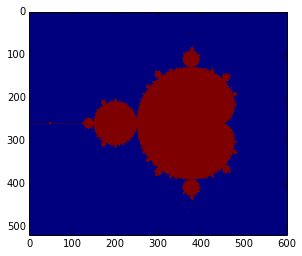

In [9]:
plt.imshow(np.abs(Z_out < 4))

#### Making it nicer

In [10]:
tf.reset_default_graph()
C = tf.placeholder(shape=C_.shape, dtype='complex64')
Z = tf.Variable(tf.zeros(C_.shape, dtype='complex64'))
N = tf.Variable(tf.zeros(C_.shape, dtype='float32')) #Counting the number of steps before divergence

update_Z = Z*Z + C #The new value of Z (stored temporarely)
not_diverged = tf.complex_abs(update_Z) < 4 #Checking if 

step = tf.group(
    Z.assign(update_Z),
    N.assign_add(tf.cast(not_diverged, tf.float32))
)

with tf.Session() as sess:
    tf.initialize_all_variables().run()
    for i in range(200):
        sess.run(step, {C:C_})
    Z_out, N_ = sess.run([Z, N])

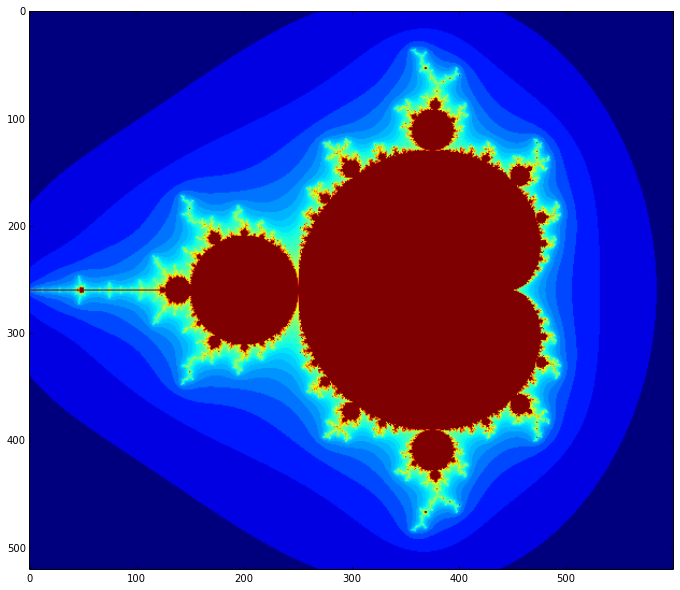

In [11]:
plt.figure(figsize=(14, 10))
plt.imshow(np.log(np.abs(N_)))